# **Codig Dojo**: Track 1
## Creado por: Alejandro Acosta León

- Fecha de creación: 2022-02-06
- Fecha de modificación: 2022-02-06
- Descripción: Hotel bookings

## 1. Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pandas_profiling import ProfileReport

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

%matplotlib inline
plt.rcParams['figure.dpi'] = 120

sns.set()
plt.style.use('seaborn-ticks')

## 2. Carga y limpieza de datos

In [2]:
df = pd.read_csv('hotel_bookings.csv', low_memory=False)
dtypes = {'hotel': 'object',
          'is_canceled': 'int64',
          'lead_time': 'int64',
          'arrival_date_year': 'int64',
          'arrival_date_month': 'object',
          'arrival_date_week_number': 'int64',
          'arrival_date_day_of_month': 'int64',
          'stays_in_weekend_nights': 'int64',
          'stays_in_week_nights': 'int64',
          'adults': 'int64',
          'children': 'int64',
          'babies': 'int64',
          'meal': 'object',
          'country': 'object',
          'market_segment': 'object',
          'distribution_channel': 'object',
          'is_repeated_guest': 'int64',
          'previous_cancellations': 'int64',
          'previous_bookings_not_canceled': 'int64',
          'reserved_room_type': 'object',
          'assigned_room_type': 'object',
          'booking_changes': 'int64',
          'deposit_type': 'object',
          'agent': 'int64',
          'company': 'int64',
          'days_in_waiting_list': 'int64',
          'customer_type': 'object',
          'adr': 'float64',
          'required_car_parking_spaces': 'int64',
          'total_of_special_requests': 'int64',
          'reservation_status': 'object',
          'reservation_status_date': 'datetime64[ns]',}


<AxesSubplot:>

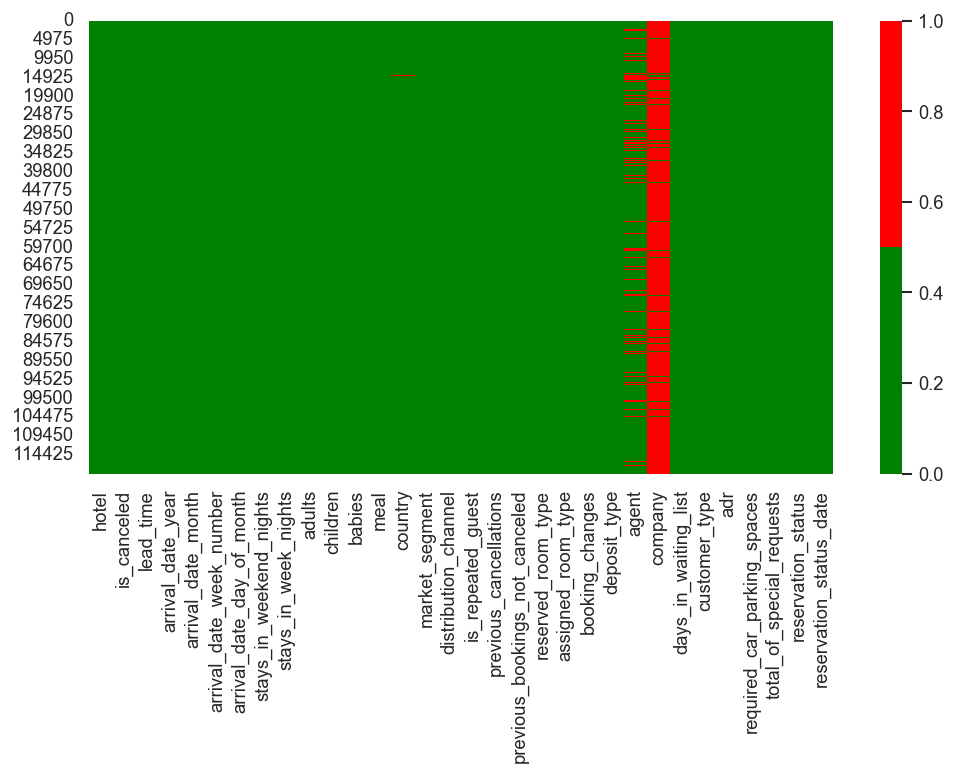

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap=['green','red'])

In [4]:
print(sum(df.agent.isna() ^ df.company.isna()))
df[~df.agent.isna() & ~df.company.isna()] [['agent','company']]

109413


,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
...,...,...
112499,9.0,478.0
113046,290.0,148.0
113082,290.0,148.0
113627,14.0,229.0


Parecería que ambas columnas se complementan (agent y company). Sin embargo, existen celdas que tienen llenas ambas variables pero con valores diferentes. Ambas variables tienen demasiados valores perdidos y su significado es ambiguo por lo que se eliminarán del listado.

In [5]:
for i in ['agent','company']:
    dtypes.pop(i)
    df.drop(i, axis=1, inplace=True)


Las variables country y children tienen valores perdidos pero corresponden a menos del 1% de la muestra. Por lo tanto se eliminan los registros vacios

In [6]:
l1 = df.shape[0]
df.dropna(inplace=True)
l2 = df.shape[0]

print('Registros perdidos: ', l1-l2, '. Corresponde al :',
      np.round((l1-l2)/l1*100, 2), '% de la muestra')


Registros perdidos:  492 . Corresponde al : 0.41 % de la muestra


In [7]:
# limpiamos valores numéricos y convertimos al valor correcto
cols = [i for i in dtypes if (dtypes[i]!=df.dtypes[i])]
for i in list(cols):
   if df.dtypes[i]=='object': 
      df[i] = df[i].str.extract('(\d+)', expand=False)

for i in df.columns:
   if dtypes[i]=='object': df[i] = df[i].astype('category')
   else: df[i] = df[i].astype(dtypes[i])

In [8]:
cat_var = [i for i in df.dtypes.index if df.dtypes[i] == 'object']

{i:len(df[i].unique()) for i in cat_var}

{}

In [9]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
          'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df.arrival_date_month = df.arrival_date_month.map(months).astype(int)


## Gráficos y correlación entre variables

In [10]:
df.dtypes

hotel                                   category
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int32
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

### ¿Qué factores están asociados con el aumento de reservas?


In [29]:
profile = ProfileReport(df, minimal=False)
profile.to_file(output_file="hotel-report.html")

Summarize dataset:  81%|████████▏ | 35/43 [00:03<00:00, 19.97it/s, Calculate kendall correlation]                  C:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 31.21it/s]


### ¿Qué factores están asociados con una menor cantidad de cancelaciones?


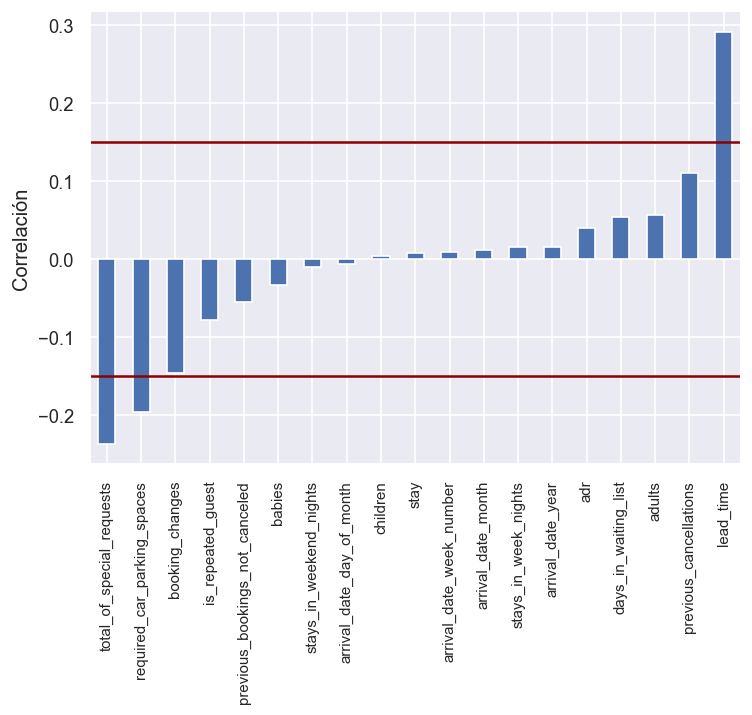

In [28]:
sns.set()
plt.figure(figsize=(7,5))
df.corr()['is_canceled'].drop('is_canceled').sort_values().plot(kind='bar')
plt.axhline(-0.15, color='darkred')
plt.axhline(+0.15, color='darkred')
plt.ylabel('Correlación')
plt.xticks(fontsize=9)
plt.savefig('cancel-correlation.png',dpi=120, bbox_inches='tight')
plt.show()

In [13]:
df['distribution_channel'] = df.distribution_channel.astype('category')

In [14]:
yvar = ['is_canceled']
xvars = [i for i in df.columns if (i not in yvar) & (df.dtypes[i] in ['int64','float64'])]

Xtrain = df[xvars]
Xtrain['constant'] = 1
ytrain = df[yvar]

C:\Users\alejo\AppData\Local\Temp/ipykernel_23024/1669908264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain['constant'] = 1


In [15]:
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.521805
         Iterations 15


C:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [16]:
log_reg.summary()

C:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:               118898
Model:                          Logit   Df Residuals:                   118880
Method:                           MLE   Df Model:                           17
Date:                Mon, 07 Feb 2022   Pseudo R-squ.:                  0.2090
Time:                        02:15:22   Log-Likelihood:                -62042.
converged:                       True   LL-Null:                       -78434.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.0047   7.39e-05     63.015      0.000       0.005       0.005
arrival_date_year                  0.2264      0.013     17.318      0.000       0.201       0.252
arrival_date_week_number          -0.0021      0.001     -3.215      0.001      -0.003      -0.001
arrival_date_day_of_month         -0.0009      0.001     -1.155      0.248      -0.002       0.001
stays_in_weekend_nights           -0.0188      0.008     -2.366      0.018      -0.034      -0.003
stays_in_week_nights               0.0113      0.004      2.692      0.007       0.003       0.020
adults                             0.1086      0.015      7.395      0.000       0.080       0.137
children                           0.0795      0.018      4.303      0.000       0.043       0.116
babies                             0.1503      0.082      1.837      0.066      -0.010       0.311
is_repeated_guest                 -1.1657      0.084    -13.885      0.000      -1.330      -1.001
previous_cancellations             3.1305      0.057     54.721      0.000       3.018       3.243
previous_bookings_not_canceled    -0.5965      0.026    -22.636      0.000      -0.648      -0.545
booking_changes                   -0.6739      0.016    -42.212      0.000      -0.705      -0.643
days_in_waiting_list              -0.0009      0.000     -2.573      0.010      -0.002      -0.000
adr                                0.0060      0.000     34.188      0.000       0.006       0.006
required_car_parking_spaces     -237.1552   2.16e+44   -1.1e-42      1.000   -4.24e+44    4.24e+44
total_of_special_requests         -0.7340      0.010    -70.112      0.000      -0.755      -0.714
constant                        -457.8296     26.366    -17.365      0.000    -509.505    -406.154
==================================================================================================
"""

### ¿Qué épocas del año están asociadas con un nivel de cancelación alto?


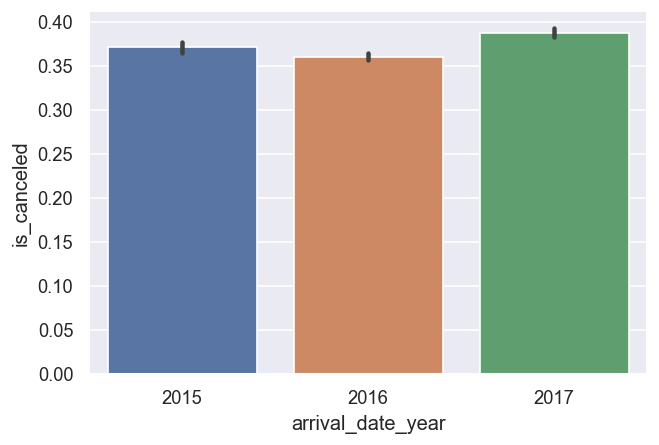

In [17]:
sns.barplot(data=df, y='is_canceled', x='arrival_date_year')
plt.show()

No hay una diferencia importante entre años

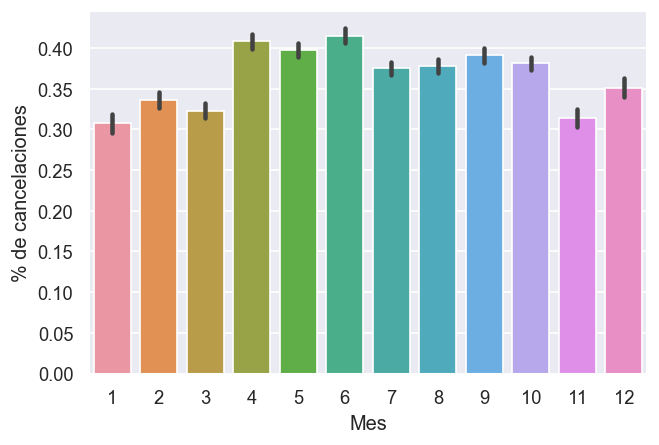

In [18]:
sns.barplot(data=df, y='is_canceled', x='arrival_date_month')
plt.xlabel('Mes')
plt.ylabel(r'% de cancelaciones')
plt.savefig('cancelaciones-por-mes.png',dpi=120, bbox_inches='tight')
plt.show()


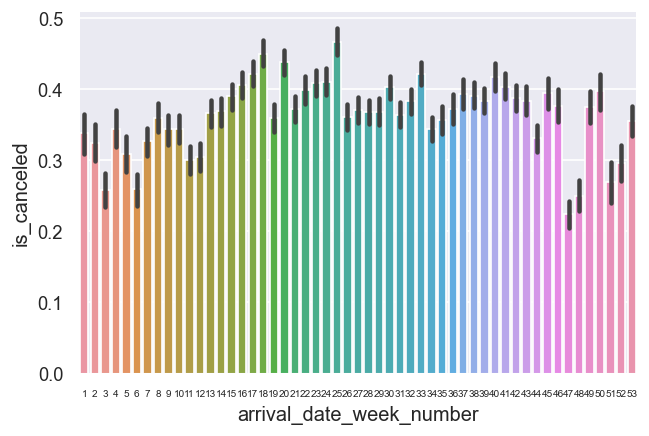

In [19]:
sns.barplot(data=df, y='is_canceled', x='arrival_date_week_number')
plt.xticks(fontsize=6)
plt.show()

La época con más cancelaciones es el segundo trimestre del año

### ¿Cuáles son las épocas del año más populares para que los huéspedes reserven?


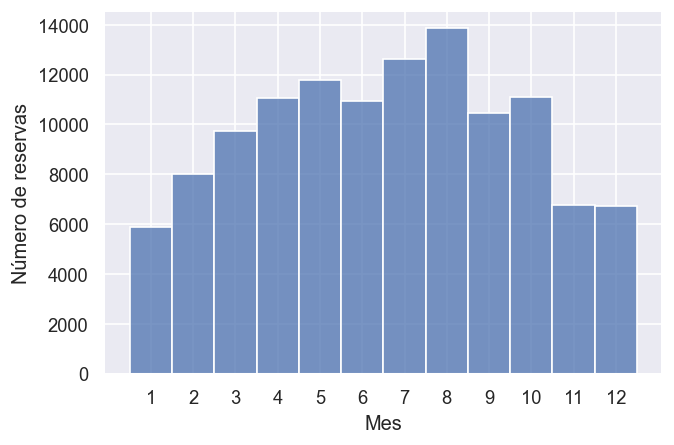

In [20]:
sns.set()
sns.histplot(data=df, x='arrival_date_month', discrete=True)
plt.xlabel('Mes')
plt.ylabel(r'Número de reservas')
plt.xticks(range(1,13))
plt.savefig('num-reservas.png',dpi=120, bbox_inches='tight')
plt.show()


### ¿Cuándo son las reservas más altas?


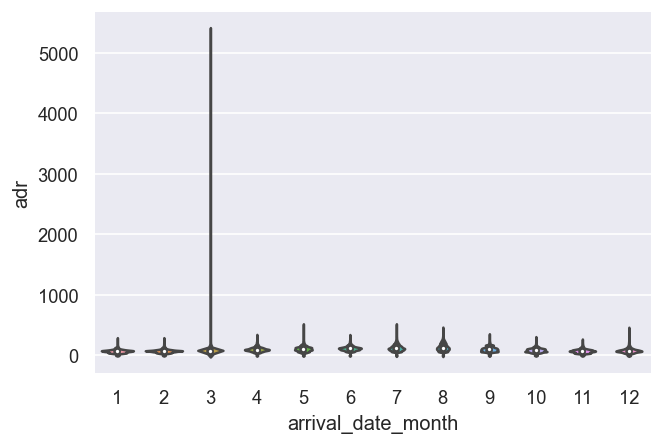

In [21]:
sns.violinplot(data=df, y='adr', x='arrival_date_month')
plt.show()

Se encuentran algunos datos atípicos, estos se eliminan de la muestra.

In [22]:
df = df[df.adr < 500]

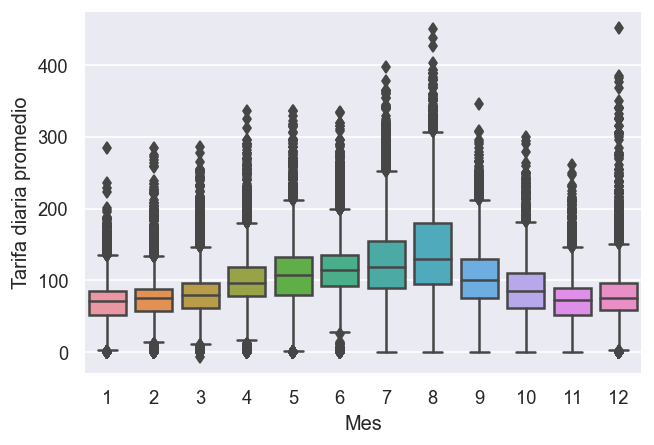

In [23]:
sns.boxplot(data=df, y='adr', x='arrival_date_month')
plt.xlabel('Mes')
plt.ylabel('Tarifa diaria promedio')
plt.savefig('tarifa.png',dpi=120, bbox_inches='tight')
plt.show()

### ¿Cuál es la duración óptima de estadía para que los huéspedes obtengan la mejor tarifa diaria?

In [24]:
df['stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

<AxesSubplot:xlabel='stay', ylabel='Count'>

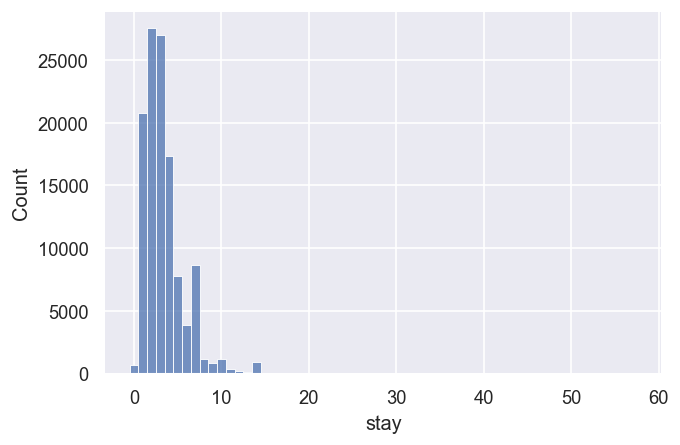

In [25]:
sns.histplot(data=df, x='stay', discrete=True)

Existen muy pocas observaciones con estadías mayores a los 20 días por lo tanto se truncará la muestra para evitar este sesgo.

In [26]:
df = df[df.stay.between(1,20)]

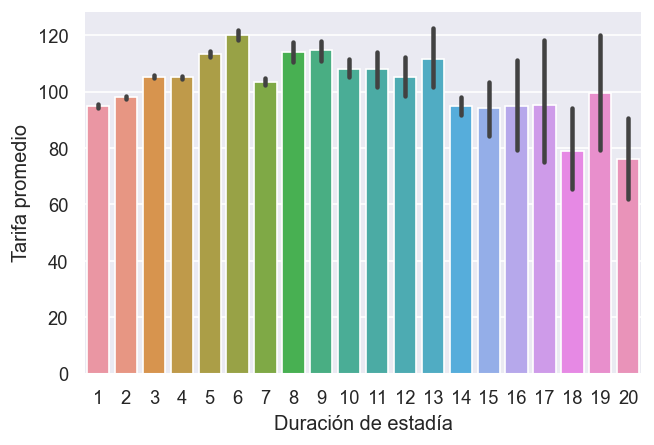

In [27]:
sns.barplot(data=df, y='adr', x='stay')
plt.xlabel('Duración de estadía')
plt.ylabel('Tarifa promedio')
plt.savefig('tarifa-estadia.png',dpi=120, bbox_inches='tight')
plt.show()
